## Importação das Bibliotecas, Leitura e Adaptação dos Dados

In [28]:
#Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Leitura do Banco de Dados
bd = pd.read_csv("dataset.csv")
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [30]:
#Mudança dos tipos das colunas de orçamento e bilheteria (de object para float64)
bd['budget'] = pd.to_numeric(bd['budget'], errors='coerce')
bd['box_office'] = pd.to_numeric(bd['box_office'], errors='coerce')

In [31]:
#Criação da coluna de lucro (bilheteria - custo)
bd['profit'] = bd['box_office']-bd['budget']

In [32]:
#Criação da coluna com a década de lançamento
bd['decade'] = (bd['year']-1)//10*10

In [33]:
#Conversão do tempo de object (com horas e minutos) para float64 (minutos) e criação da coluna de uma coluna com o tempo em valor numérico
tempomin = []
for k in range(len(bd)):
    filme = bd['run_time'][k]
    if filme.count('h') == 0 and filme != 'Not Available':
        filme ='0h' + filme
    a = filme.replace('m', 'h').split('h')
    soma = 0
    for i in range(len(a)):
        if a[i] == 'Not Available':
            tempomin.append('Not Available')
        else:
            if i == 0:
                soma += (60*int(a[i]))
            if i == 1 and a[i] != '':
                soma += int(a[i])
    if a[0] != 'Not Available':
        tempomin.append(soma)
bd['run_time_minutes'] = tempomin
bd['run_time_minutes'] = pd.to_numeric(bd['run_time_minutes'], errors='coerce')

In [34]:
#Informações sobre o banco de dados após as modificações
bd.describe()

,rank,year,rating,budget,box_office,profit,decade,run_time_minutes
count,250.000000,250.000000,250.000000,2.060000e+02,2.170000e+02,2.030000e+02,250.000000,249.000000
mean,125.500000,1986.360000,8.307200,5.291227e+07,2.382076e+08,2.005178e+08,1980.720000,129.052209
std,72.312977,25.125356,0.229081,1.778697e+08,3.825392e+08,3.868560e+08,25.243425,30.223383
min,1.000000,1921.000000,8.000000,1.330000e+05,6.700000e+01,-2.229994e+09,1920.000000,45.000000
25%,63.250000,1966.250000,8.100000,3.000000e+06,8.574081e+06,5.356614e+06,1960.000000,107.000000
50%,125.500000,1994.000000,8.200000,1.500000e+07,7.403672e+07,6.486203e+07,1990.000000,126.000000
75%,187.750000,2006.000000,8.400000,5.100000e+07,3.217527e+08,2.965431e+08,2000.000000,145.000000
max,250.000000,2022.000000,9.300000,2.400000e+09,2.799439e+09,2.443439e+09,2020.000000,238.000000


## Análise dos Dados

In [35]:
#Média das notas dos filmes
bd['rating'].mean()

8.3072

In [36]:
#Média de duração dos filmes
print(round(bd['run_time_minutes'].mean(), 2), 'min')

129.05 min


In [37]:
#Moda dos diretores
numeromax = bd['directors'].value_counts().max()
diretores = bd['directors'].value_counts()
print('O número de aparições dos diretores que mais possuem filmes na lista é', numeromax)
for i in range(len(diretores)):
    if diretores[i] == numeromax:
        print(diretores.index[i])
print('São os diretores que aparecem', numeromax, 'vezes.')

O número de aparições dos diretores que mais possuem filmes na lista é 7
Martin Scorsese
Christopher Nolan
Steven Spielberg
Stanley Kubrick
Akira Kurosawa
São os diretores que aparecem 7 vezes.


In [38]:
#Coeficiente de correlação entre nota e ano de lançamento
bd[['rating', 'year']].corr()

,rating,year
rating,1.000000,0.032203
year,0.032203,1.000000


In [39]:
#Coeficiente de correlação entre ano de lançamento e bilheteria
bd[['year', 'box_office']].corr()

,year,box_office
year,1.000000,0.455255
box_office,0.455255,1.000000


In [40]:
#Coeficiente de correlação entre orçamento e duração
bd[['box_office', 'run_time_minutes']].corr()

,box_office,run_time_minutes
box_office,1.000000,0.143628
run_time_minutes,0.143628,1.000000


In [41]:
#Filmes que geraram prejuízo (custo de produção maior que bilheteria)
prejuizo = bd[bd['profit']<0]
print(len(prejuizo))
prejuizo

35


,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,profit,decade,run_time_minutes
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,3.500000e+05,955.0,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,-3.490450e+05,1950,96.0
19,20,Seven Samurai,1954,8.6,"Action,Drama",Not Rated,3h 27m,Will Take Its Place With the Seven Greatest Fi...,1.250000e+08,346258.0,"Toshirô Mifune,Takashi Shimura,Keiko Tsushima,...",Akira Kurosawa,"Akira Kurosawa,Shinobu Hashimoto,Hideo Oguni",-1.246537e+08,1950,207.0
43,44,Grave of the Fireflies,1988,8.5,"Animation,Drama,War",Not Rated,1h 29m,imationDramaWar,3.700000e+06,516962.0,"Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguch...",Isao Takahata,"Akiyuki Nosaka,Isao Takahata",-3.183038e+06,1980,89.0
46,47,Modern Times,1936,8.5,"Comedy,Drama,Romance",G,1h 27m,He stands alone as the greatest entertainer of...,1.500000e+06,463618.0,"Charles Chaplin,Paulette Goddard,Henry Bergman...",Charles Chaplin,Charles Chaplin,-1.036382e+06,1930,87.0
51,52,City Lights,1931,8.5,"Comedy,Drama,Romance",G,1h 27m,HE RETURNS -And the world rocks again with lau...,1.500000e+06,50419.0,"Charles Chaplin,Virginia Cherrill,Florence Lee...",Charles Chaplin,"Charles Chaplin,Harry Carr,Harry Crocker",-1.449581e+06,1930,87.0
58,59,Sunset Blvd.,1950,8.4,"Drama,Film-Noir",Passed,1h 50m,A Hollywood Story,1.752000e+06,300073.0,"William Holden,Gloria Swanson,Erich von Strohe...",Billy Wilder,"Charles Brackett,Billy Wilder,D.M. Marshman Jr.",-1.451927e+06,1940,110.0
59,60,Paths of Glory,1957,8.4,"Drama,War",Approved,1h 28m,Never has the screen thrust so deeply into the...,9.350000e+05,5252.0,"Kirk Douglas,Ralph Meeker,Adolphe Menjou,Georg...",Stanley Kubrick,"Stanley Kubrick,Calder Willingham,Jim Thompson",-9.297480e+05,1950,88.0
61,62,The Great Dictator,1940,8.4,"Comedy,Drama,War",G,2h 5m,The Comedy Masterpiece!,2.000000e+06,970263.0,"Charles Chaplin,Paulette Goddard,Jack Oakie,Re...",Charles Chaplin,Charles Chaplin,-1.029737e+06,1930,125.0
63,64,Witness for the Prosecution,1957,8.4,"Crime,Drama,Mystery",Approved,1h 56m,The most electrifying entertainment of our time!,3.000000e+06,7693.0,"Tyrone Power,Marlene Dietrich,Charles Laughton...",Billy Wilder,"Agatha Christie,Billy Wilder,Harry Kurnitz",-2.992307e+06,1950,116.0
78,79,Princess Mononoke,1997,8.4,"Animation,Action,Adventure",PG-13,2h 14m,Live on.,2.400000e+09,170005875.0,"Yôji Matsuda,Yuriko Ishida,Yûko Tanaka,Billy C...",Hayao Miyazaki,"Hayao Miyazaki,Neil Gaiman",-2.229994e+09,1990,134.0


## Geração de Gráficos

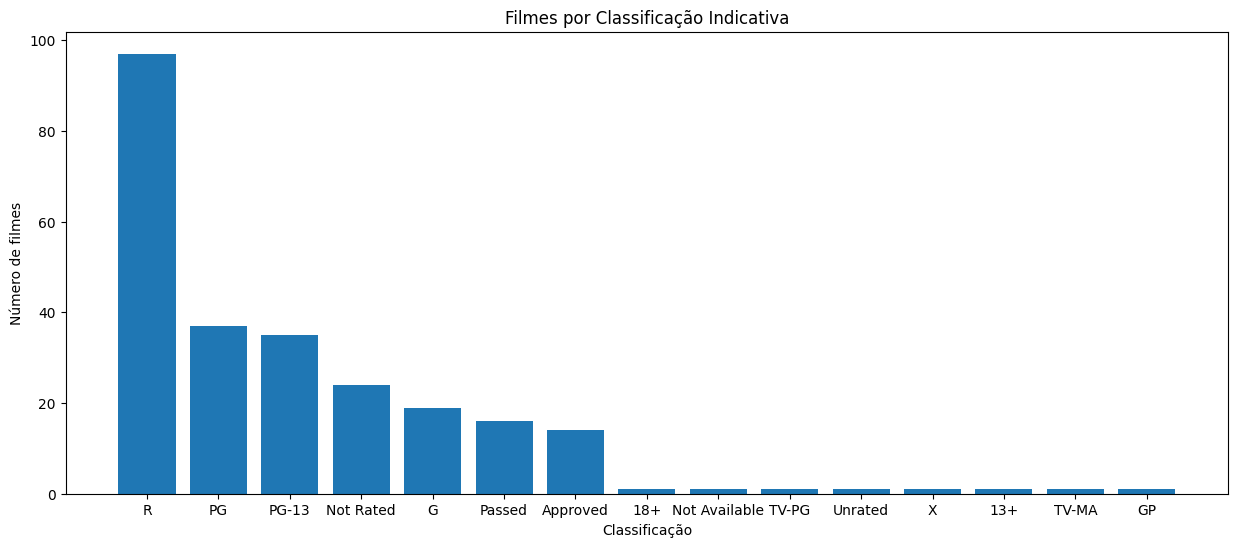

In [42]:
#Gŕafico da quantidade de filmes por classificação indicativa
plt.figure(figsize=(15,6))
plt.title('Filmes por Classificação Indicativa')
plt.xlabel('Classificação')
plt.ylabel('Número de filmes')
plt.bar(bd['certificate'].value_counts().index, bd['certificate'].value_counts().values)
plt.show()

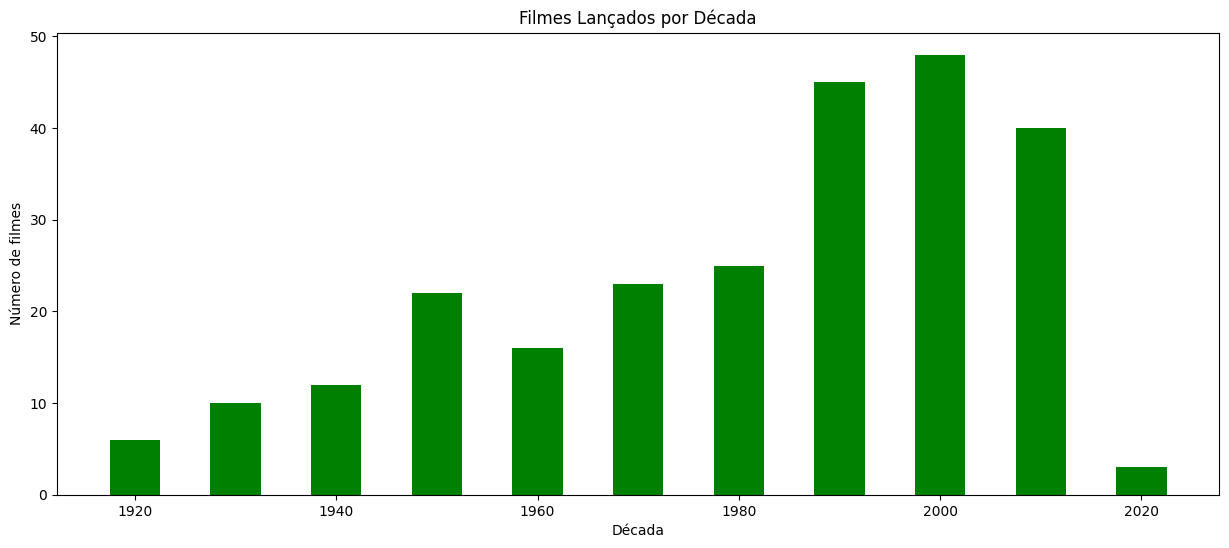

In [43]:
#Gráfico da quantidade de filmes por década
plt.figure(figsize=(15,6))
plt.title('Filmes Lançados por Década')
plt.xlabel('Década')
plt.ylabel('Número de filmes')
plt.bar(bd['decade'].value_counts().index, bd['decade'].value_counts().values, width=5, color='green')
plt.show()

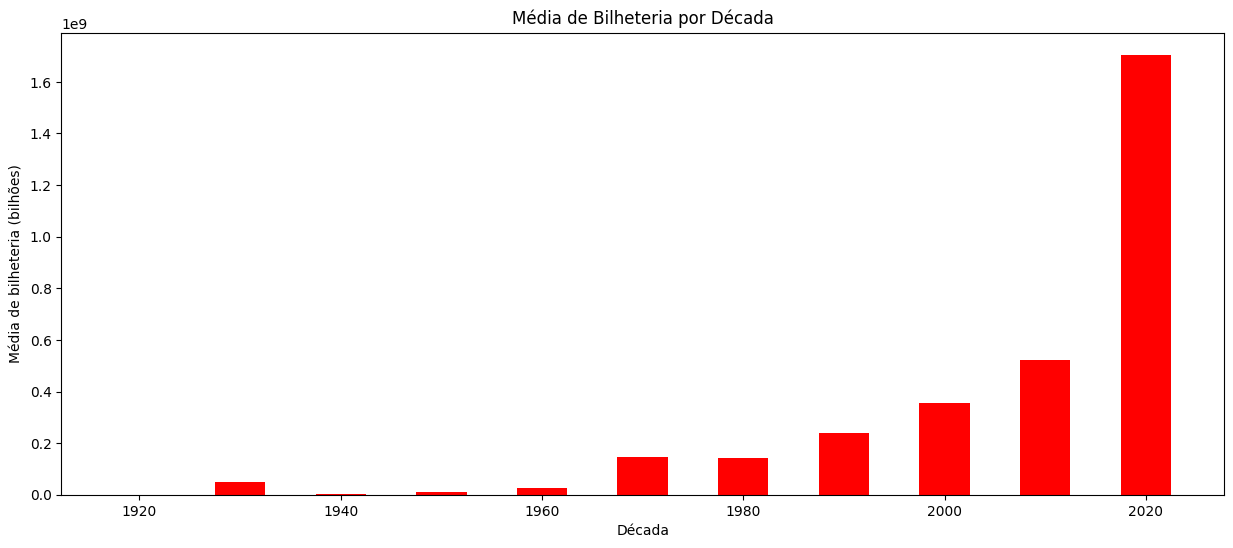

In [44]:
#Gráfico da média de bilheteria por década
plt.figure(figsize=(15,6))
plt.title('Média de Bilheteria por Década')
plt.xlabel('Década')
plt.ylabel('Média de bilheteria (bilhões)')
plt.bar(bd.groupby(['decade'])['box_office'].mean().index, bd.groupby(['decade'])['box_office'].mean().values, width=5, color='red')
plt.show()

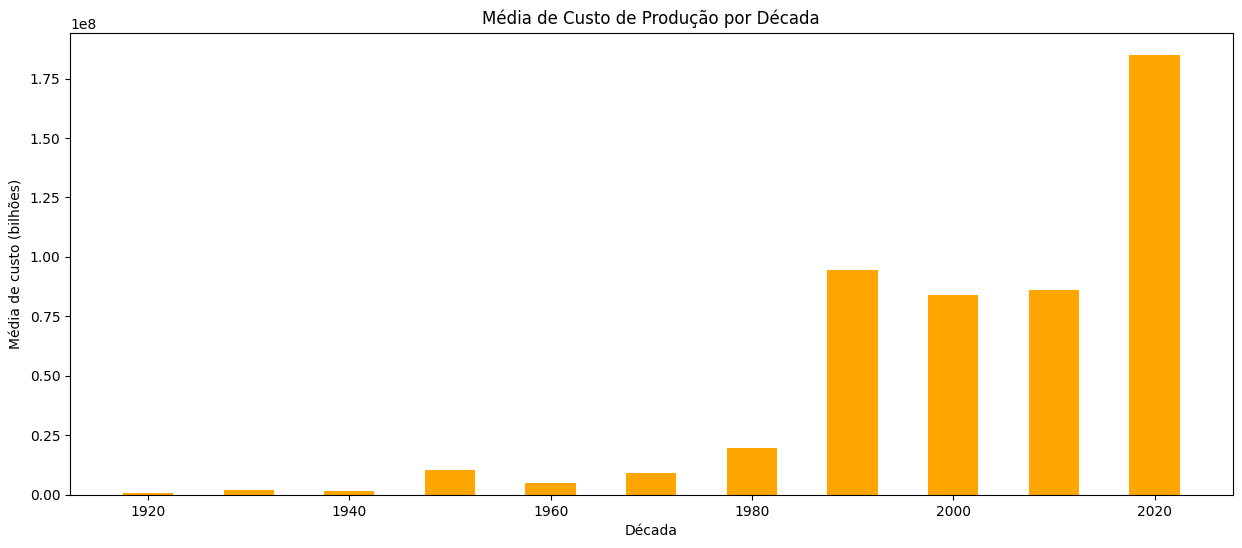

In [45]:
#Gráfico da média de custo de produção por década
plt.figure(figsize=(15,6))
plt.title('Média de Custo de Produção por Década')
plt.xlabel('Década')
plt.ylabel('Média de custo (bilhões)')
plt.bar(bd.groupby(['decade'])['budget'].mean().index, bd.groupby(['decade'])['budget'].mean().values, width=5, color='orange')
plt.show()